# 1.简介
图像的实质是一种二维信号，滤波是信号处理中的一个重要概念。在图像处理中，滤波是一种非常常见的技术，它们的原理非常简单，但是其思想却十分值得借鉴，滤波是很多图像算法的前置步骤或基础，掌握图像滤波对理解卷积神经网络也有一定帮助。

# 2.学习目标
- 了解图像滤波的分类和基本概念

- 理解均值滤波/方框滤波、高斯滤波的原理

- 掌握OpenCV框架下滤波API的使用

# 3.内容介绍
- 均值滤波/方框滤波、高斯滤波的原理

- OpenCV代码实践

# 4.算法理论介绍
## 4.1均值滤波、方框滤波
### 滤波分类
- 线性滤波：对邻域中的像素的计算为线性运算时，如利用窗口函数进行平滑加权求和的运算，或者某种卷积运算，都可以称为线性滤波。常见的线性滤波有：均值滤波、高斯滤波、盒子滤波、拉普拉斯滤波等等，通常线性滤波器之间只是模版系数不同。

- 非线性滤波： 非线性滤波利用原始图像跟模版之间的一种逻辑关系得到结果，如最值滤波器，中值滤波器。比较常用的有中值滤波器和双边滤波器。

### 方框(盒子)滤波
方框滤波是一种非常有用的线性滤波，也叫盒子滤波，均值滤波就是盒子滤波归一化的特殊情况。 **应用**： 可以说，一切需要求某个邻域内像素之和的场合，都有方框滤波的用武之地，比如：均值滤波、引导滤波、计算Haar特征等等。

优势： 就一个字：快！它可以使复杂度为O(MN)的求和，求方差等运算降低到O(1)或近似于O(1)的复杂度，也就是说与邻域尺寸无关了，有点类似积分图吧，但是比积分图更快（与它的实现方式有关）。

在原理上，是采用一个卷积核与图像进行卷积：
$$K=\alpha\left[ \begin{matrix} 1 & 1 & 1 &{\cdots}&1 \\ 1 & 1 & 1 &{\cdots}&1 \\ {\cdots}&{\cdots}&{\cdots}&{\cdots}&{\cdots}\\ 1 & 1 &1 &{\cdots}&1\end{matrix} \right]$$
其中：
$$\alpha=\begin{cases}\frac{1}{ksize.width*ksize.height}& when normalize=true\\1 & otherwise\end{cases}$$

可见，归一化了就是均值滤波；不归一化则可以计算每个像素邻域上的各种积分特性，方差、协方差，平方和等等。

### 均值滤波
**均值滤波的应用场合**： 根据冈萨雷斯书中的描述，均值模糊可以模糊图像以便得到感兴趣物体的粗略描述，也就是说，去除图像中的不相关细节，其中“不相关”是指与滤波器模板尺寸相比较小的像素区域，从而对图像有一个整体的认知。即为了对感兴趣的物体得到一个大致的整体的描述而模糊一幅图像，忽略细小的细节。

**均值滤波的缺陷**： 均值滤波本身存在着固有的缺陷，即它不能很好地保护图像细节，在图像去噪的同时也破坏了图像的细节部分，从而使图像变得模糊，不能很好地去除噪声点。特别是椒盐噪声。

均值滤波是上述方框滤波的特殊情况，均值滤波方法是：对待处理的当前像素，选择一个模板，该模板为其邻近的若干个像素组成，用模板的均值（方框滤波归一化）来替代原像素的值。公式表示为：
$$g(x,y)=\frac{1}{n}\sum_{I\in Neighbour}I(x,y)$$
g(x,y)为该邻域的中心像素，n跟系数模版大小有关,一般$3*3$邻域的模板，n取为9，如：
$$\left[ \begin{matrix} 1 & 1 & 1  \\ 1 & 1 & 1\\  1 & 1 &1 \end{matrix} \right]$$
> 注：在实际处理过程中可对图像边界进行扩充，扩充为0或扩充为邻近的像素值。

### 高斯滤波
应用： 高斯滤波是一种线性平滑滤波器，对于服从正态分布的噪声有很好的抑制作用。在实际场景中，我们通常会假定图像包含的噪声为高斯白噪声，所以在许多实际应用的预处理部分，都会采用高斯滤波抑制噪声，如传统车牌识别等。

高斯滤波和均值滤波一样，都是利用一个掩膜和图像进行卷积求解。不同之处在于：均值滤波器的模板系数都是相同的为1，而高斯滤波器的模板系数，则随着距离模板中心的增大而系数减小（服从二维高斯分布）。所以，高斯滤波器相比于均值滤波器对图像个模糊程度较小，更能够保持图像的整体细节。

# 5.基于OpenCV的实现
### 方框滤波
> 函数 cv2.boxFilter(src,目标图像深度，核大小，normalize属性)
>- 目标图像深度：int类型，通常“-1”表示与原始图像一致
>- normalize属性：是否对结果进行归一化处理，true与均值滤波相同，false容易发生溢出

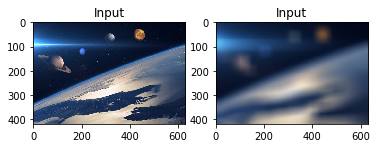

In [51]:
import cv2
import numpy as np
img = cv2.cvtColor(cv2.imread('test1.jpeg'), cv2.COLOR_BGR2RGB)
box=cv2.boxFilter(img,-1,(49,49),normalize=True)
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(box),plt.title('Input')
plt.show()

### 高斯滤波

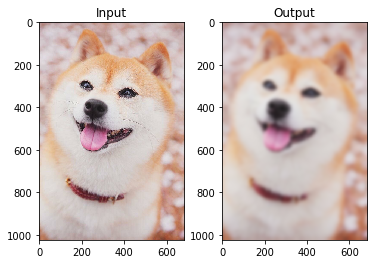

In [41]:
import cv2
import numpy as np
#高斯滤波
#构造权重矩阵
img = cv2.cvtColor(cv2.imread('test2.jpeg'), cv2.COLOR_BGR2RGB)
blur = cv2.GaussianBlur(img,(49,49),0)
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(blur),plt.title('Output')
plt.show()

### 均值滤波

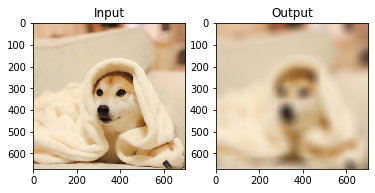

In [56]:
import cv2
import numpy as np
#blur平均值去噪，均值滤波
#简单的平均卷积操作
img = cv2.cvtColor(cv2.imread('test3.jpeg'), cv2.COLOR_BGR2RGB)
blur = cv2.blur(img,(49,49))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(blur),plt.title('Output')
plt.show()

### 中值滤波
在这里，函数cv.medianBlur() 提取内核区域下所有像素的中值，并将中心元素替换为该中值。这对于消除图像中的椒盐噪声非常有效。有趣的是，在上述过滤器中，中心元素是新计算的值，该值可以是图像中的像素值或新值。但是在中值模糊中，中心元素总是被图像中的某些像素值代替。有效降低噪音。其内核大小应为正奇数整数。

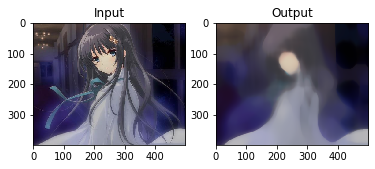

In [54]:
import cv2
import numpy as np
#中值滤波
img = cv2.cvtColor(cv2.imread('test4.jpg'), cv2.COLOR_BGR2RGB)
median = cv2.medianBlur(img,49)
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(median),plt.title('Output')
plt.show()

### 双边滤波
cv2.bilateralFilter() 在去除噪声的同时保持边缘清晰锐利非常有效。但是，与其他过滤器相比，该操作速度较慢。我们已经看到，高斯滤波器采用像素周围的邻域并找到其高斯加权平均值。高斯滤波器仅是空间的函数，也就是说，滤波时会考虑附近的像素。它不考虑像素是否具有几乎相同的强度。它不考虑像素是否是边缘像素。因此它也模糊了边缘，这是我们不想做的。

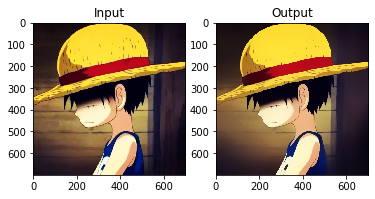

In [68]:
import cv2
import numpy as np
img = cv2.cvtColor(cv2.imread('test5.jpeg'), cv2.COLOR_BGR2RGB)
blur = cv2.bilateralFilter(img,91,75,75)
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(blur),plt.title('Output')
plt.show()

# 参考博客
- http://www.woshicver.com/FifthSection/4_4_%E5%9B%BE%E5%83%8F%E5%B9%B3%E6%BB%91/
- https://github.com/datawhalechina/team-learning/blob/master/%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89%E5%9F%BA%E7%A1%80%EF%BC%9A%E5%9B%BE%E5%83%8F%E5%A4%84%E7%90%86%EF%BC%88%E4%B8%8A%EF%BC%89/Task04%20%E5%9B%BE%E5%83%8F%E6%BB%A4%E6%B3%A2.md